#***FAKE NEWS PREDICTION***

---
#**Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
   
   - **4.1** [**Data Description**](#Section41)
   - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Preparation**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>

---
<a name = Section1></a>
#**1. Introduction**
---


- The advent of the World Wide Web and the rapid adoption of social media platforms (such as Whatsaap, Instagram, Facebook and Twitter) paved the way for information dissemination that has never been witnessed in the human history before.
- With the current usage of social media platforms, consumers are creating and sharing more information than ever before, some of which are misleading with no relevance to reality.
- Automated classification of a text article as misinformation or disinformation is a challenging task. Even an expert in a particular domain has to explore multiple aspects before giving a verdict on the truthfulness of an article.
- n this work, we propose to use Deep learning approach for automated classification of news articles. Our study explores different textual properties that can be used to distinguish fake contents from real.

---
<a name = Section2></a>
#**2. Problem Statement**
---

- Fake news from different social networking sites are fastely spread among the society and can cause serious issues many time.
- So i m predicting the news is real or fake using Deep Learning Technique.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


In [4]:
from google.colab import files
upload = files.upload()

Saving news.csv to news.csv


In [5]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.shape

(6335, 4)

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [7]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [9]:
df.isnull().sum()
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

---
<a name = Section5></a>
# **5. Data Pre-Processing**
---

In [11]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
df.shape

(6335, 3)

In [13]:
df['text'] = df['title'] + " " + df['text']
df['text'].head()

0    You Can Smell Hillary’s Fear Daniel Greenfield...
1    Watch The Exact Moment Paul Ryan Committed Pol...
2    Kerry to go to Paris in gesture of sympathy U....
3    Bernie supporters on Twitter erupt in anger ag...
4    The Battle of New York: Why This Primary Matte...
Name: text, dtype: object

In [14]:
df['text'][0]

'You Can Smell Hillary’s Fear Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership i

In [15]:
df['text'] = df['text'].apply(lambda x: str(x).lower())
df['text'].head()

0    you can smell hillary’s fear daniel greenfield...
1    watch the exact moment paul ryan committed pol...
2    kerry to go to paris in gesture of sympathy u....
3    bernie supporters on twitter erupt in anger ag...
4    the battle of new york: why this primary matte...
Name: text, dtype: object

In [16]:
df = df.drop(['title'], axis=1)
df.head()

,text,label
0,you can smell hillary’s fear daniel greenfield...,FAKE
1,watch the exact moment paul ryan committed pol...,FAKE
2,kerry to go to paris in gesture of sympathy u....,REAL
3,bernie supporters on twitter erupt in anger ag...,FAKE
4,the battle of new york: why this primary matte...,REAL


In [17]:
print(df['label'].unique())

['FAKE' 'REAL']


In [18]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,text,label
0,you can smell hillary’s fear daniel greenfield...,0
1,watch the exact moment paul ryan committed pol...,0
2,kerry to go to paris in gesture of sympathy u....,1
3,bernie supporters on twitter erupt in anger ag...,0
4,the battle of new york: why this primary matte...,1


In [19]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus =[]
for i in range(0, len(df)):
  print(i)
  review = re.sub('[^a-zA-z]', ' ', df['text'][i])
  #review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524

In [20]:
corpus

Output hidden; open in https://colab.research.google.com to view.

In [21]:
voc_size = 10000
onehot_repr = [one_hot(words,voc_size) for words in corpus]
print(onehot_repr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
sent_length = 1000
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 7629 1068 9302]
 [   0    0    0 ... 5135 2632  776]
 [   0    0    0 ... 1689 8086 3769]
 ...
 [2785 9676 3111 ... 5785 6175 6852]
 [   0    0    0 ... 2697 3725 5652]
 [   0    0    0 ... 3987 7175 7642]]


In [23]:
len(embedded_docs)

6335

In [24]:
embedded_docs.shape

(6335, 1000)

---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---

In [25]:
#joining all the words of df['text'] with a blank space
text = ' '.join(df['text'].tolist())

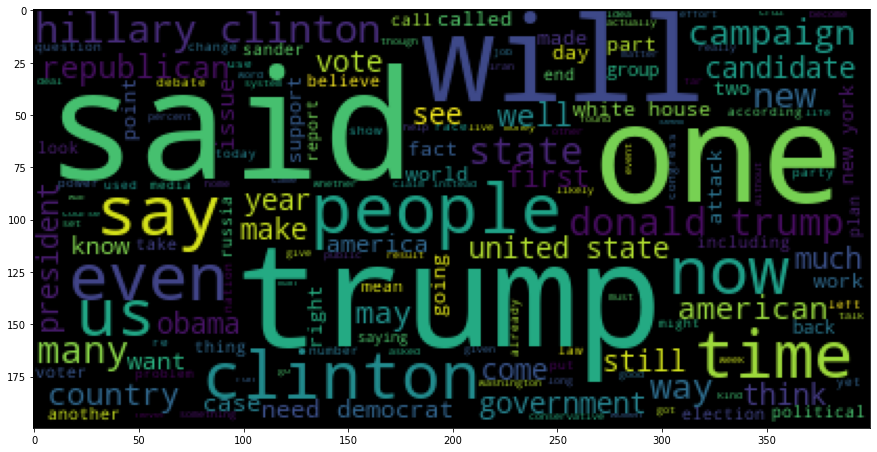

In [26]:
#visualizing most frequent words in df['text'] data
wordcloud = WordCloud().generate(text)
fig = plt.figure(figsize = (15,30))
plt.imshow(wordcloud)

---
<a name = Section7></a>
#**7. Data Prepration**
---

In [27]:
x_final = np.array(embedded_docs)
y = df.iloc[:, 1]
y_final = np.array(y)

In [28]:
x_final.shape,y_final.shape

((6335, 1000), (6335,))

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.3, random_state=0)

In [43]:
x_train

array([[   0,    0,    0, ..., 1278, 9543, 6062],
       [   0,    0,    0, ...,  209,  839, 9036],
       [   0,    0,    0, ..., 4193, 5943,  132],
       ...,
       [   0,    0,    0, ..., 4193, 1354, 9485],
       [   0,    0,    0, ..., 6042, 6034, 1360],
       [   0,    0,    0, ..., 9750, 6960, 2098]], dtype=int32)

In [44]:
x_test

array([[   0,    0,    0, ..., 4560, 1429, 9781],
       [   0,    0,    0, ..., 4926, 3987, 2030],
       [   0,    0,    0, ..., 2915, 3663, 7230],
       ...,
       [   0,    0,    0, ..., 9674, 4437, 6323],
       [7406, 2250, 6096, ...,  486, 4943, 7037],
       [   0,    0,    0, ..., 6933,  285, 3020]], dtype=int32)

In [45]:
y_train

array([1, 1, 0, ..., 0, 0, 1])

In [46]:
y_test

array([1, 0, 0, ..., 0, 1, 1])

----
<a name = Section8></a>
# **8. Model Development & Evaluation**
----

In [32]:
#Creating Model
embedding_vector_features=1000
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(units = 128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 1000)        10000000  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               578048    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 10,578,177
Trainable params: 10,578,177
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Model Training
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
70/70 [==============================] - 30s 315ms/step - loss: 0.4562 - accuracy: 0.7900 - val_loss: 0.3822 - val_accuracy: 0.8380
Epoch 2/20
70/70 [==============================] - 22s 310ms/step - loss: 0.2076 - accuracy: 0.9269 - val_loss: 0.3718 - val_accuracy: 0.8453
Epoch 3/20
70/70 [==============================] - 22s 310ms/step - loss: 0.0973 - accuracy: 0.9691 - val_loss: 0.3944 - val_accuracy: 0.8422
Epoch 4/20
70/70 [==============================] - 21s 306ms/step - loss: 0.0480 - accuracy: 0.9860 - val_loss: 0.4736 - val_accuracy: 0.8532
Epoch 5/20
70/70 [==============================] - 22s 314ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.5521 - val_accuracy: 0.8680
Epoch 6/20
70/70 [==============================] - 22s 313ms/step - loss: 0.0159 - accuracy: 0.9959 - val_loss: 0.5036 - val_accuracy: 0.8627
Epoch 7/20
70/70 [==============================] - 22s 308ms/step - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.6485 - val_accuracy: 0.8480

In [37]:
#Performance Metrics
y_pred=model.predict_classes(x_test)
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[791, 142],
       [129, 839]])

In [41]:
#Accuracy Percentage
accuracy_score(y_test,y_pred)*100

85.74434508153604

In [42]:
#precision, recall, f1-score, support, etc
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       933
           1       0.86      0.87      0.86       968

    accuracy                           0.86      1901
   macro avg       0.86      0.86      0.86      1901
weighted avg       0.86      0.86      0.86      1901



In [56]:
#checking the present news
a = ['Watch: Afghan official confirms Danish Siddique was executed by Taliban - Ajmal Omar Shinwari, Spokesperson, Afghan National Defence and Security Forces (ANDSF), has officially confirmed that Indian photojournalist Danish Siddiqui was captured and executed by the Taliban. A Pulitzer Prize winner, Danish Siddiqui was killed while covering clashes between Afghan troops and the Taliban in Spin Boldak district of Kandahar city. Shinwari also repeated the claim made by other Afghanistan government officials that the Taliban are funded and supported by Pakistan. "Its a proxy war that the Afghanistan government is fighting," he said.']
a = [one_hot(words, voc_size) for words in a]
a = pad_sequences(a, maxlen=sent_length)
model.predict(a)
(model.predict(a) > 0.5).astype(int)

array([[1]])